# PID Control with Setpoint Weighting

## Setpoint Weighting

\begin{align}
MV & = \overline{MV} + K_P e_P + K_I\int_0^t e_I\ dt' + K_D\frac{de_D}{dt}
\end{align}

where the error terms are given by

\begin{align*}
e_P(t) & = \beta\ SP - PV \\
e_I(t) & = SP - PV \\
e_D(t) & = \gamma\ SP - PV
\end{align*}


## Define function for impementation of setpoint weighting

In [4]:
def PID(Kp, Ki, Kd, MV_bar=0, beta=1, gamma=0):
    #initial stored
    eD_prev = 0
    t_prev = -100
    I = 0
    
    #initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, SP, PV
        t, PV, SP = yield MV
        
        # PID calculations
        P = Kp*(beta*SP-PV)
        I = I + Ki*(SP-PV)*(t-t_prev)
        eD = gamma*SP-PV
        D = Kd*(eD-eD_prev)/(t-t_prev)
        MV = MV_bar + P + I + D
        
        #update stored data for next iteration
        eD_prev = eD
        t_prev = t

In [5]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

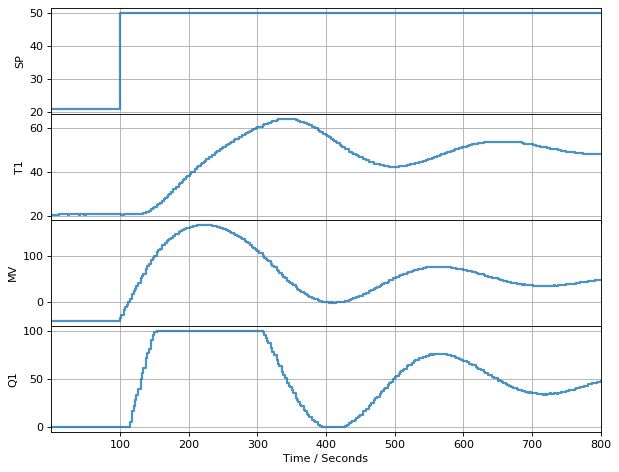

TCLab Model disconnected successfully.


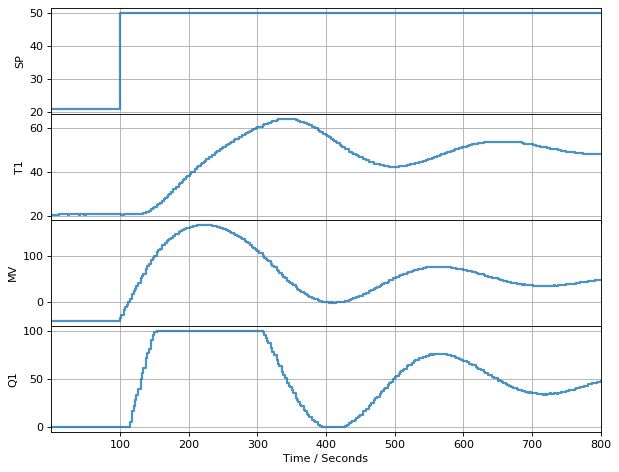

In [6]:
TCLab = setup(connected=False, speedup=10)

controller = PID(2, 0.1, 2, beta=0) # create pid control
controller.send(None) # initialize

t_final = 800
with TCLab() as lab:
    h = Historian([('SP', lambda:SP),('T1', lambda:lab.T1),('MV',lambda:MV),('Q1',lab.Q1)])
    p = Plotter(h, t_final)
    T1 = lab.T1
    for t in clock(t_final,2):
        SP = T1 if t<100 else 50 # get setpoint
        PV = lab.T1
        MV = controller.send([t,PV,SP]) # compute manipulated varriable
        lab.U1 = MV # apply
        p.update(t) # update information display